In [1]:
# 기본 library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# linked = linkage(X, 'single')

In [2]:
cos_data = pd.read_csv('cossim_job_detail0.csv')
tfidf_data = pd.read_csv('tfidf_job_detail0.csv')
data = tfidf_data.iloc[:, 1:].values
tfidf_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7562,7563,7564,7565,7566,7567,7568,7569,7570,7571
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


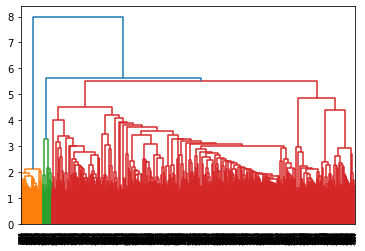

In [3]:
import scipy.cluster.hierarchy as shc


# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [27]:
from sklearn.cluster import AgglomerativeClustering

data = tfidf_data.iloc[:, 1:].values
cluster = AgglomerativeClustering(n_clusters=200, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data)
labels

array([10,  5,  4, ..., 34, 64, 34], dtype=int64)

In [28]:
np.where(labels == 6)


(array([  17,   59,  114,  350,  384,  425,  524,  594,  614,  673,  795,
         833,  868,  894, 1097, 1109, 1176, 1541, 1626, 1677, 1687, 1804,
        1823, 1849, 1887, 1957, 2083, 2111, 2194, 2204, 2273, 2275],
       dtype=int64),)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


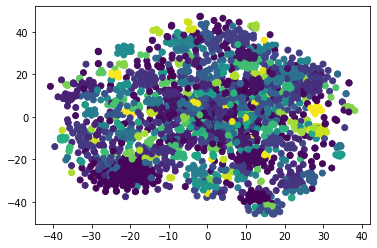

In [38]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=150)
transformed = model.fit_transform(data)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

plt.show()

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(data, labels)

average_score = silhouette_score(data, labels)
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

score_samples[1]

Silhouette Analysis Score:0.064


-0.027608976493742856

In [8]:

for i in range(10):
    tmp = score_samples[np.where(labels== i)].mean()
    print(str(i) + ':' + str(tmp))

0:-0.006877633454370638
1:-0.04291803129081052
2:0.06765766342936741
3:0.025749801833190516
4:0.07204881742422103
5:0.06857073354388861
6:-0.01967261277768094
7:-0.0208199031364537
8:0.0037522716660940117
9:-0.023208496043673785


In [9]:
len(score_samples[np.where(labels== 1)])

286

In [10]:
len(np.where(labels== 1)[0])

286

In [11]:
np.where(data[0] != 0)


(array([ 501,  502,  980, 1360, 1373, 2621, 2825, 3059, 3066, 3072, 4226,
        5021, 5022, 5309, 5407, 5689, 5718, 5746, 5747, 5826, 5828, 6161,
        7514], dtype=int64),)

In [19]:
## 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward')
        # clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

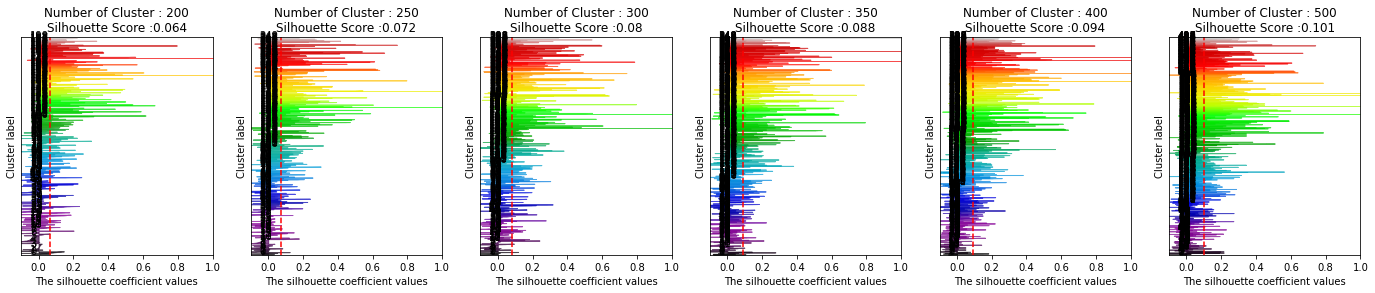

In [39]:
visualize_silhouette([200,250,300,350,400,500], data)

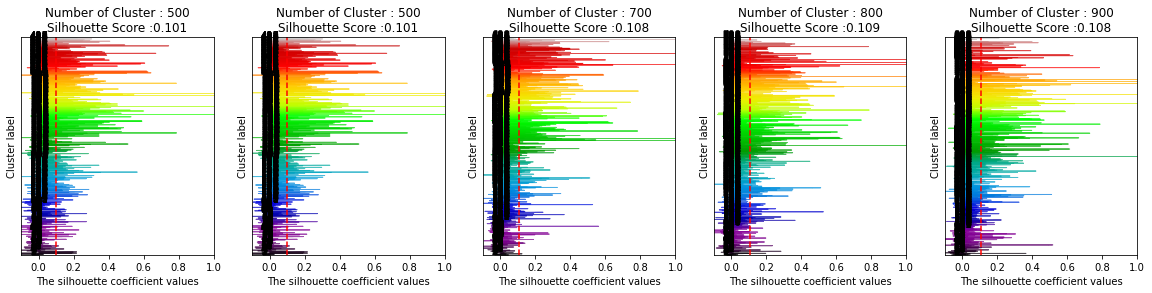

In [40]:
visualize_silhouette([500,500,700,800,900], data)

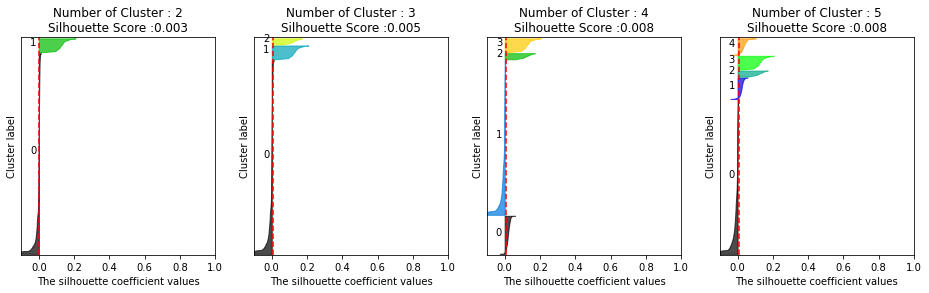

In [42]:
visualize_silhouette([2,3,4,5], data)